# 1. Скачайте данные о "Среднемесячной номинальной начисленной заработной плате работников организаций по видам экономической деятельности в Российской Федерации за 2000-2023 гг."
[ссылка](https://уровень-инфляции.рф/таблицы-инфляции)

# 2. Скачайте данные об уровне инфляции в стране
[ссылка](https://уровень-инфляции.рф/таблицы-инфляции)

Таблица уровня инфляции по месяцам в годовом исчислении.
Коэффициент инфляции в годовом исчислении рассчитывается как сумма коэффициентов инфляции за 12 месяцев, включая выбранный. Такой способ позволяет оценить динамику изменения уровня инфляции в целом, сглаживая сезонные отклонения.

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL веб-страницы с данными
url = 'https://уровень-инфляции.рф/таблицы-инфляции'

# Отправка запроса на получение содержимого страницы
response = requests.get(url)

# Парсинг HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Поиск таблицы по какому-либо идентификатору
# Например, если у таблицы есть класс 'inflation-table', можно использовать:
# table = soup.find('table', {'class': 'inflation-table'})

# В этом примере просто найдем первую таблицу
table = soup.find('table')

# Преобразование HTML-таблицы в DataFrame
df = pd.read_html(str(table))[0]

# Сохранение данных в CSV-файл
df.to_csv('inflation_data.csv', index=False)

print('Данные скачаны и сохранены в файле "inflation_data.csv".')

Данные скачаны и сохранены в файле "inflation_data.csv".


# 3.Выберите 2-3 вида экономической деятельности, наиболее интересные Вам. Постройте графики изменения зарплаты по годам для этих видов экономической деятельности. Сделайте выводы

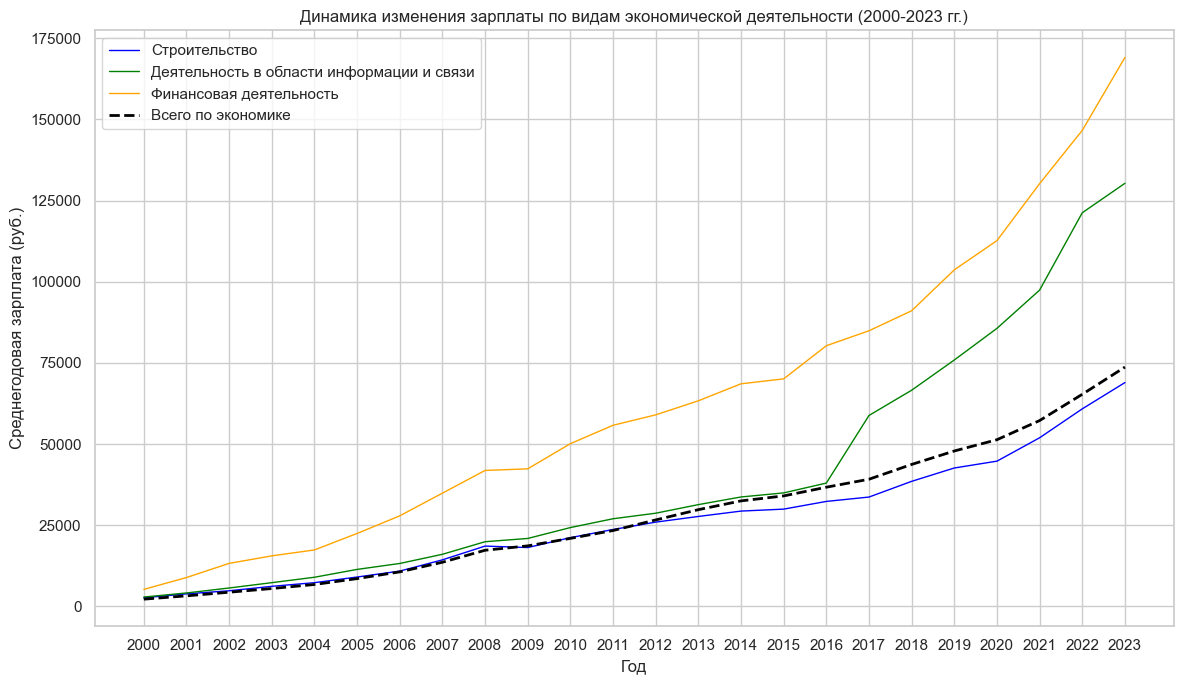

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('task3.csv', delimiter=';')
# Преобразование словаря в DataFrame
df = pd.DataFrame(data)

# Установка 'Год' в качестве индекса
df.set_index('Год', inplace=True)

# Определение размера фигуры: уменьшить ширину, если метки перекрываются
fig_width = max(10, len(df.index) * 0.5)  # Эвристика: 0.5 дюйма на метку года

plt.figure(figsize=(fig_width, 7))  # Настройка ширины фигуры на основе эвристики

# Определение цветов и стилей линий
colors = {
    "Строительство": "blue",
    "Деятельность в области информации и связи": "green",
    "Финансовая деятельность": "orange",
    "Всего по экономике": "black"
}
line_styles = {
    "Всего по экономике": '--'
}

# Цикл для отображения колонок с указанными цветами и стилями линий
for column in df.columns:
    plt.plot(df.index, df[column], label=column, color=colors[column], 
             linestyle=line_styles.get(column, '-'), linewidth=2 if column == 'Всего по экономике' else 1)

# Настройка горизонтальных меток на оси X для отображения каждого года
plt.xticks(df.index)  # Горизонтальное отображение меток

# Добавление заголовков и меток
plt.title('Динамика изменения зарплаты по видам экономической деятельности (2000-2023 гг.)')
plt.xlabel('Год')
plt.ylabel('Среднегодовая зарплата (руб.)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Выводы: 
1. Общий рост зарплат: Наблюдается стабильный рост зарплат на протяжении всего рассматриваемого периода.

2. Самый высокий рост заработной платы в финансовой сфере, связан с развитием финансовых технологий, увеличением объема финансовых услуг и ростом капитализации рынка.

3. Деятельность в области информации и связи также показывает значительный рост, особенно после 2016 года, и отражает глобальный тренд цифровизации: бурное развитие информационных технологий и их повсеместное внедрение, переход к цифровой экономике и экономике данных.

4. Строительство: Динамика роста зарплат в строительстве тесно следует за общеэкономической тенденцией, поскольку этот сектор тесно связан с общей экономической активностью и инфраструктурными проектами, которые, как правило, обеспечены государственными инвестициями.

5. Динамика по сравнению с экономикой в целом: Зарплаты в секторах "Деятельность в области информации и связи" и "Финансовая деятельность" растут значительно быстрее, чем в среднем по экономике.Эти секторы являются более высокотехнологичными и востребованными, а также имеют большую добавленную стоимость и потенциал для инвестиций.


# 4 Пересчитайте средние зарплаты с учетом уровня инфляции и сравните, как влияет инфляция на изменение зарплаты по сравнению с предыдущим годом

In [13]:
import pandas as pd
# pd.set_option('display.float_format', '{:.1f}'.format)

salary = pd.read_excel('zpl.xlsx', sheet_name='task4')
salary.set_index('Год', inplace=True)
salary.head()

,Строительство,Информация и связь,Финансовая деятельность,Всего по экономике
Год,,,,
2000,2639.8,2879.2,5232.2,2223.4
2001,3859.3,4131.2,8885.2,3240.4
2002,4806.9,5661.5,13245.9,4360.3
2003,6176.7,7304.2,15561.2,5498.5
2004,7304.7,8974.2,17383.8,6739.5


In [14]:
import pandas as pd
data = pd.read_csv('inflation_data.csv')
inflation_data = pd.DataFrame(data)
# Keep only the 'Год' and 'Всего' columns
inflation_data = inflation_data[['Год', 'Всего']]
# Rename 'Всего' column to 'Инфляция'
inflation_data.rename(columns={'Всего': 'Инфляция'}, inplace=True)
inflation_data.set_index('Год', inplace=True)
# Display the modified DataFrame
inflation_data.head()

# we filter for the years 2000 to 2023
filtered_inflation_data = inflation_data[(inflation_data.index >= 2000) & (inflation_data.index <= 2023)]

# Now we reverse the DataFrame
reversed_inflation_data = filtered_inflation_data.iloc[::-1]

# Display the modified DataFrame
reversed_inflation_data

,Инфляция
Год,
2000,20.20
2001,18.58
2002,15.06
2003,11.99
2004,11.74
2005,10.91
2006,9.00
2007,11.87
2008,13.28


In [15]:
# Функция расчета реальной зарплаты
def calculate_real_salary(nominal_salary, inflation_rate):
    """
    Функция для расчета реальной зарплаты с учетом инфляции.
    :param nominal_salary: Номинальная зарплата
    :param inflation_rate: Уровень инфляции
    :return: Реальная зарплата
    """
    price_index = 1 + inflation_rate / 100
    return nominal_salary / price_index

# Расчет реальной зарплаты для каждого года
real_salary = salary.copy()


for year in real_salary.index:
    # Изменение номинальной зарплаты в реальную с учетом инфляции
    real_salary.loc[year] = calculate_real_salary(
        salary.loc[year],
        inflation_data.loc[year, 'Инфляция']
    )

# Расчет абсолютного изменения реальной зарплаты для каждого года
real_salary_absolute_change = real_salary.diff()

# Расчет процентного изменения реальной зарплаты для каждого года
real_salary_percent_change = real_salary.pct_change() * 100

# Теперь добавим эти данные обратно в DataFrame real_salary
real_salary = real_salary.join(real_salary_absolute_change, rsuffix='_абсолютное_изменение')
real_salary = real_salary.join(real_salary_percent_change, rsuffix='_процентное_изменение')



# Определяем новый порядок столбцов
columns_order = ['Строительство', 'Строительство_абсолютное_изменение', 'Строительство_процентное_изменение',
                 'Информация и связь', 'Информация и связь_абсолютное_изменение', 'Информация и связь_процентное_изменение',
                 'Финансовая деятельность', 'Финансовая деятельность_абсолютное_изменение', 'Финансовая деятельность_процентное_изменение',
                 'Всего по экономике', 'Всего по экономике_абсолютное_изменение', 'Всего по экономике_процентное_изменение']

# Упорядочиваем столбцы в DataFrame
real_salary_ordered = real_salary.reindex(columns=columns_order)

# Выведем первые несколько строк обновленного DataFrame для проверки
real_salary_ordered.head()

,Строительство,Строительство_абсолютное_изменение,Строительство_процентное_изменение,Информация и связь,Информация и связь_абсолютное_изменение,Информация и связь_процентное_изменение,Финансовая деятельность,Финансовая деятельность_абсолютное_изменение,Финансовая деятельность_процентное_изменение,Всего по экономике,Всего по экономике_абсолютное_изменение,Всего по экономике_процентное_изменение
Год,,,,,,,,,,,,
2000,2196.173045,NaN,NaN,2395.341098,NaN,NaN,4352.911814,NaN,NaN,1849.750416,NaN,NaN
2001,3254.596053,1058.423008,48.193971,3483.892731,1088.551632,45.444535,7493.000506,3140.088692,72.137659,2732.669927,882.919512,47.731819
2002,4177.733357,923.137303,28.364113,4920.476273,1436.583543,41.235011,11512.167565,4019.167059,53.638954,3789.588041,1056.918114,38.677123
2003,5515.403161,1337.669804,32.019033,6522.189481,1601.713208,32.551995,13895.169212,2383.001647,20.699852,4909.813376,1120.225335,29.560610
2004,6537.229282,1021.826121,18.526771,8031.322713,1509.133232,23.138445,15557.365312,1662.196101,11.962403,6031.412207,1121.598831,22.844022


In [16]:
# Расчет абсолютного и процентного изменения номинальной зарплаты
nominal_salary_absolute_change = salary.diff()
nominal_salary_percent_change = salary.pct_change() * 100

# Сравнение изменений номинальной и реальной зарплаты
# Для наглядности, можно сравнить, например, процентное изменение номинальной и реальной зарплаты в отдельном DataFrame
salary_comparison = pd.DataFrame({
    'Номинальная_абсолютное_изменение': nominal_salary_absolute_change.stack(),
    'Номинальная_процентное_изменение': nominal_salary_percent_change.stack(),
    'Реальная_абсолютное_изменение': real_salary_absolute_change.stack(),
    'Реальная_процентное_изменение': real_salary_percent_change.stack(),
}).reset_index()

# Переименуем столбцы для лучшей читаемости
salary_comparison.rename(columns={'level_1': 'Тип деятельности', 0: 'Значение'}, inplace=True)

# Отобразим сравнительный анализ для первых нескольких записей
salary_comparison.head()

,Год,Тип деятельности,Номинальная_абсолютное_изменение,Номинальная_процентное_изменение,Реальная_абсолютное_изменение,Реальная_процентное_изменение
0,2001,Строительство,1219.5,46.196682,1058.423008,48.193971
1,2001,Информация и связь,1252.0,43.484301,1088.551632,45.444535
2,2001,Финансовая деятельность,3653.0,69.817668,3140.088692,72.137659
3,2001,Всего по экономике,1017.0,45.740757,882.919512,47.731819
4,2002,Строительство,947.6,24.553676,923.137303,28.364113


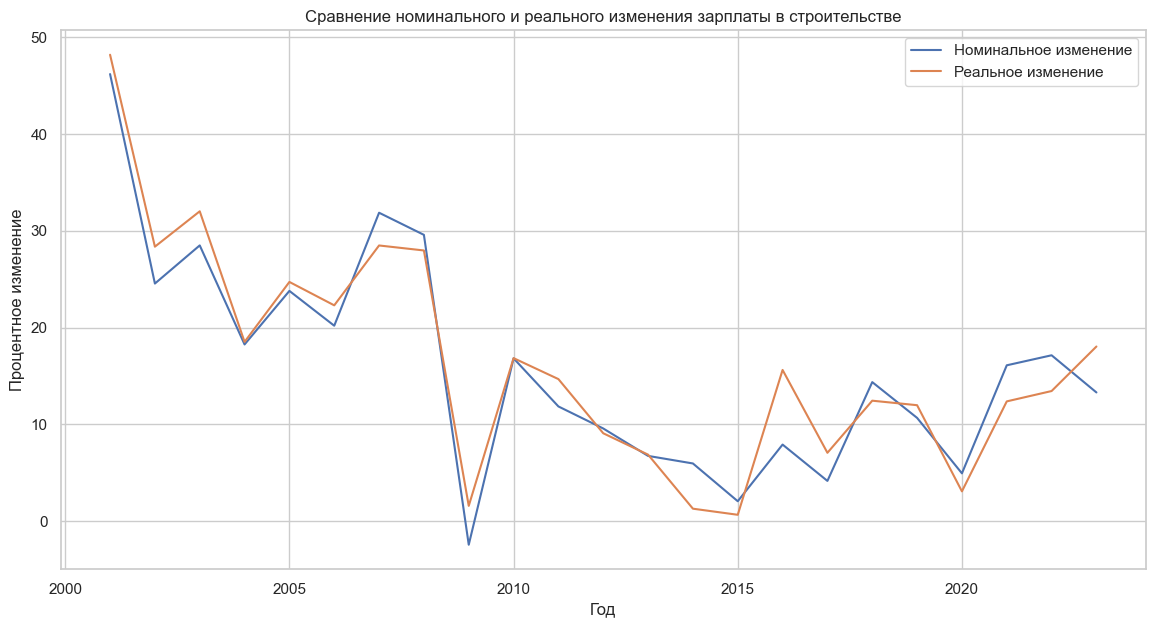

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение графиков для визуализации
plt.figure(figsize=(14, 7))

# Сравнительный график номинального и реального процентного изменения для выбранного типа деятельности
# Например, для 'Строительство'
sns.lineplot(data=salary_comparison[salary_comparison['Тип деятельности'] == 'Строительство'],
             x='Год', y='Номинальная_процентное_изменение', label='Номинальное изменение')
sns.lineplot(data=salary_comparison[salary_comparison['Тип деятельности'] == 'Строительство'],
             x='Год', y='Реальная_процентное_изменение', label='Реальное изменение')

plt.title('Сравнение номинального и реального изменения зарплаты в строительстве')
plt.ylabel('Процентное изменение')
plt.xlabel('Год')
plt.legend()
plt.show()

Реальное процентное изменение зарплаты больше номинального, при положительной инфляции, это может показаться нелогичным. Однако такая ситуация может возникнуть в реальности из-за следующих причин:

Эффект высокой базы: При снжении темпов инфляции: если в предыдущем году инфляция была высокой, а в текущем снизилась (но всё же положительна), то даже при умеренном росте номинальной зарплаты реальное изменение может быть больше номинального.

Нестандартные изменения в зарплатах: Возможны ситуации, когда зарплаты растут быстрее общего уровня цен из-за политических решений, повышения минимальной заработной платы или других экономических факторов.

In [18]:
# Добавим столбец с разницей между номинальным и реальным изменением
salary_comparison['Разница_изменения'] = (
    salary_comparison['Номинальная_процентное_изменение'] - salary_comparison['Реальная_процентное_изменение']
)

# Отобразим среднюю разницу изменения по всем годам
average_difference = salary_comparison['Разница_изменения'].mean()
print(f"Средняя разница между номинальным и реальным процентным изменением: {average_difference:.2f}%")

# Если средняя разница положительна, инфляция в среднем уменьшала реальную стоимость зарплат
# Если средняя разница отрицательна или нулевая, реальная зарплата либо сохранила свою стоимость, либо выросла быстрее номинальной


Средняя разница между номинальным и реальным процентным изменением: -0.64%


## Выводы
Отрицательная средняя разница между номинальным и реальным процентным изменением -0.64% означает, что в среднем реальные зарплаты выросли на 0.64 процентных пункта больше, чем номинальные. Это может происходить в следующих ситуациях:

Снижение инфляции: Если темп инфляции падает от года к году, реальная заработная плата может увеличиваться быстрее, чем номинальная, поскольку цены растут медленнее, чем доходы.

Стабильная покупательная способность: Поскольку реальные зарплаты учитывают инфляцию, отрицательное значение может означать, что покупательная способность зарплат сохранилась или даже улучшилась, несмотря на рост цен.

Экономическая политика: Меры экономической политики, направленные на увеличение доходов, такие как повышение минимальной заработной платы или налоговые льготы, могут привести к тому, что зарплаты будут обгонять инфляцию.

Таким образом, отрицательная средняя разница - это полжительный знак для экономики. За рассматриваемый период зарплаты в среднем росли быстрее инфляции, что привело к повышению покупательной способности и увеличению реальных доходов населения.

# 5 Выберите подходящие визуализации и отобразите динамику изменения реальных зарплат с учетом инфляции. Сделайте выводы

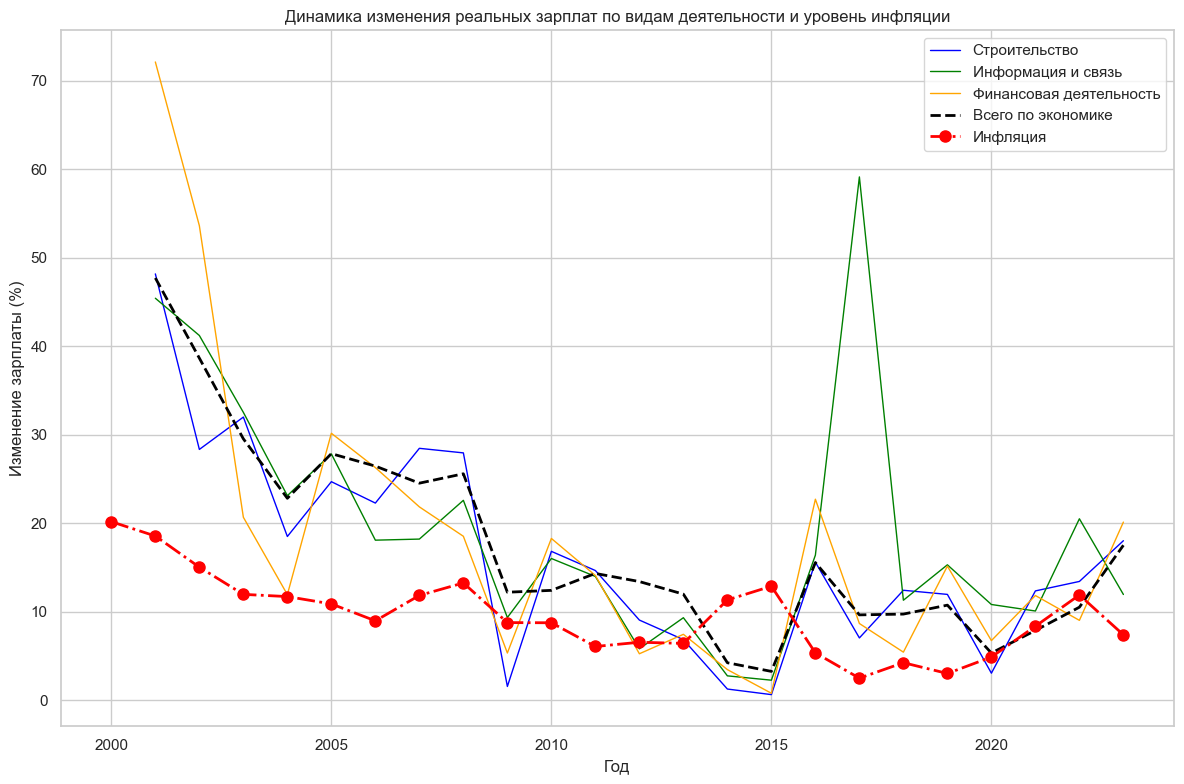

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установим стиль графика
sns.set(style="whitegrid")

# Подготовим данные, сбросив индекс, если это необходимо
if 'Год' not in real_salary.columns:
    real_salary.reset_index(inplace=True)

if 'Год' not in reversed_inflation_data.columns:
    reversed_inflation_data.reset_index(inplace=True)

# Создаем фигуру и оси для графика
fig, ax = plt.subplots(figsize=(12, 8))

# Список видов деятельности и соответствующих цветов
activities = {
    'Строительство': 'blue',
    'Информация и связь': 'green',
    'Финансовая деятельность': 'orange',
    'Всего по экономике': 'black'  # Всего по экономике будет отображаться жирным пунктиром
}

# Построение графика для каждого вида деятельности
for activity, color in activities.items():
    ax.plot(real_salary['Год'], real_salary[f'{activity}_процентное_изменение'],
            label=activity, color=color, linestyle='-' if activity != 'Всего по экономике' else '--',
            linewidth=2 if activity == 'Всего по экономике' else 1)

# Добавление графика инфляции
ax.plot(reversed_inflation_data['Год'], reversed_inflation_data['Инфляция'],
        label='Инфляция', color='red', linestyle='-.', marker='o', markersize=8, linewidth=2)

# Настройка заголовка, подписей и легенды
ax.set_title('Динамика изменения реальных зарплат по видам деятельности и уровень инфляции')
ax.set_xlabel('Год')
ax.set_ylabel('Изменение зарплаты (%)')
ax.legend()

# Показываем график
plt.tight_layout()
plt.show()


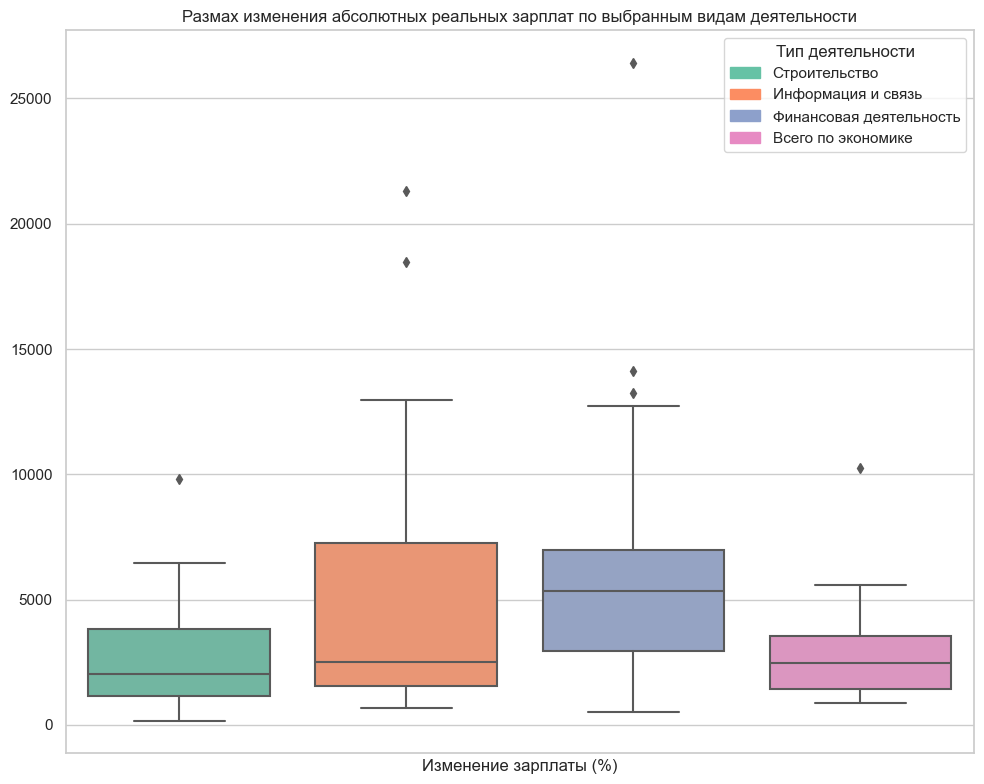

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # Добавлен импорт mpatches

# Указываем нужные категории для отображения на графике
categories_to_plot = [
    'Строительство_абсолютное_изменение', 
    'Информация и связь_абсолютное_изменение', 
    'Финансовая деятельность_абсолютное_изменение', 
    'Всего по экономике_абсолютное_изменение'
]

# Фильтруем DataFrame, чтобы оставить только интересующие нас столбцы
filtered_data = real_salary[categories_to_plot]

# Построение boxplot только для выбранных категорий
plt.figure(figsize=(10, 8))
sns.boxplot(data=filtered_data, palette='Set2')

# Убираем подписи по оси X
plt.xticks(ticks=[], labels=[])

# Создаем легенду с нужными названиями
# Определяем категории для легенды на основе имен столбцов и палитры цветов
palette = sns.color_palette("Set2", n_colors=len(categories_to_plot))
legend_handles = [mpatches.Patch(color=palette[i], label=category.split('_')[0]) 
                  for i, category in enumerate(categories_to_plot)]
plt.legend(handles=legend_handles, title='Тип деятельности')

plt.title('Размах изменения абсолютных реальных зарплат по выбранным видам деятельности')
plt.xlabel('Изменение зарплаты (%)')

plt.tight_layout()
plt.show()


## Выводы
На графике видно, что реальные зарплаты в разных секторах экономики сильно колеблются из года в год. Это может быть связано с экономическими циклами, изменениями в спросе на определённые виды деятельности, технологическими инновациями или политическими решениями.

Сравнение с уровнем инфляции: Большую часть времени изменение зарплат превышает уровень инфляции, это говорит о повышении покупательной способности населения. Также на графике хорошо видны два периода, когда инфляция выше роста реальных зарплат, в эти периоды реальный доход населения падал.

Отраслевые различия: Разные отрасли показывают различную динамику изменения зарплат. Например, может быть, что финансовый сектор в определённые годы показывает больший рост зарплат по сравнению с другими секторами, что может отражать отраслевые тенденции, например, быстрый рост в области финтеха или повышенный спрос на финансовые услуги.
